In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

### Upload aggregated overall suicide rates during 2013 to 2017

In [3]:
suicide_overall = pd.read_csv(r'Overall_Suicide_Aggregated/overall_2017_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_overall = suicide_overall.drop("Notes",1)
suicide_overall = suicide_overall.dropna(how = 'any')
suicide_overall['Deaths']=suicide_overall['Deaths'].astype(int)
suicide_overall['Population']=suicide_overall['Population'].astype(int)
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,53,276908,19.1,19.139931
1,"Baldwin County, AL",01003,201,1020551,19.7,19.695243
2,"Barbour County, AL",01005,15,131687,Unreliable,11.390646
3,"Bibb County, AL",01007,19,112912,Unreliable,16.827264
4,"Blount County, AL",01009,48,288981,16.6,16.610089


### Upload aggregated firearm suicide rates during 2013 to 2017

In [4]:
suicide_firearm = pd.read_csv(r'Firearm_Suicide_Aggregated/firearm_2017_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_firearm = suicide_firearm.drop("Notes",1)
suicide_firearm = suicide_firearm.dropna(how = 'any')
suicide_firearm['Deaths']=suicide_firearm['Deaths'].astype(int)
suicide_firearm['Population']=suicide_firearm['Population'].astype(int)
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,38,276908,13.7,13.722969
1,"Baldwin County, AL",01003,127,1020551,12.4,12.444258
2,"Barbour County, AL",01005,11,131687,Unreliable,8.353140
3,"Bibb County, AL",01007,15,112912,Unreliable,13.284682
4,"Blount County, AL",01009,35,288981,12.1,12.111523


### Upload aggregated non-firearm suicide rates during 2013 to 2017

In [5]:
suicide_nonfirearm = pd.read_csv(r'Nonfirearm_Suicide_Aggregated/nonfirearm_2017_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_nonfirearm = suicide_nonfirearm.drop("Notes",1)
suicide_nonfirearm = suicide_nonfirearm.dropna(how = 'any')
suicide_nonfirearm['Deaths']=suicide_nonfirearm['Deaths'].astype(int)
suicide_nonfirearm['Population']=suicide_nonfirearm['Population'].astype(int)
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,15,276908,Unreliable,5.416962
1,"Baldwin County, AL",01003,74,1020551,7.3,7.250985
2,"Blount County, AL",01009,13,288981,Unreliable,4.498566
3,"Calhoun County, AL",01015,21,577611,3.6,3.635665
4,"Chambers County, AL",01017,13,169917,Unreliable,7.650794


In [6]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2367
1,firearm,1967
2,nonfirearm,1456


### make up the missing non-firearm death records as many as possible

In [7]:
FS = suicide_firearm[['County Code', 'Deaths']]
FS = FS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_FS'})
NFS = suicide_nonfirearm[['County Code', 'Deaths']]
NFS = NFS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_NFS'})
suicide = suicide_overall[['County', 'County Code', 'Deaths', 'Population']]
suicide = suicide.rename(columns = {'County Code': 'fips'})

In [8]:
FS.head()

,fips,Deaths_FS
0,01001,38
1,01003,127
2,01005,11
3,01007,15
4,01009,35


In [9]:
NFS.head()

,fips,Deaths_NFS
0,01001,15
1,01003,74
2,01009,13
3,01015,21
4,01017,13


In [10]:
suicide.head()

,County,fips,Deaths,Population
0,"Autauga County, AL",01001,53,276908
1,"Baldwin County, AL",01003,201,1020551
2,"Barbour County, AL",01005,15,131687
3,"Bibb County, AL",01007,19,112912
4,"Blount County, AL",01009,48,288981


In [11]:
suicide = suicide.merge(FS, on = 'fips', how = 'left')
suicide = suicide.merge(NFS, on = 'fips', how = 'left')
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,276908,38.0,15.0
1,"Baldwin County, AL",01003,201,1020551,127.0,74.0
2,"Barbour County, AL",01005,15,131687,11.0,NaN
3,"Bibb County, AL",01007,19,112912,15.0,NaN
4,"Blount County, AL",01009,48,288981,35.0,13.0


In [12]:
suicide['Deaths_NFS'] = suicide['Deaths'] - suicide['Deaths_FS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,276908,38.0,15.0
1,"Baldwin County, AL",01003,201,1020551,127.0,74.0
2,"Barbour County, AL",01005,15,131687,11.0,4.0
3,"Bibb County, AL",01007,19,112912,15.0,4.0
4,"Blount County, AL",01009,48,288981,35.0,13.0


In [13]:
suicide['Deaths_FS'] = suicide['Deaths'] - suicide['Deaths_NFS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,276908,38.0,15.0
1,"Baldwin County, AL",01003,201,1020551,127.0,74.0
2,"Barbour County, AL",01005,15,131687,11.0,4.0
3,"Bibb County, AL",01007,19,112912,15.0,4.0
4,"Blount County, AL",01009,48,288981,35.0,13.0


In [14]:
suicide_overall = suicide[['County', 'fips', 'Deaths', 'Population']]
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,53,276908,19.139931
1,"Baldwin County, AL",01003,201,1020551,19.695243
2,"Barbour County, AL",01005,15,131687,11.390646
3,"Bibb County, AL",01007,19,112912,16.827264
4,"Blount County, AL",01009,48,288981,16.610089


In [15]:
suicide_firearm = suicide[['County', 'fips', 'Deaths_FS', 'Population']]
suicide_firearm = suicide_firearm.rename(columns = {'Deaths_FS': 'Deaths'})
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,38.0,276908,13.722969
1,"Baldwin County, AL",01003,127.0,1020551,12.444258
2,"Barbour County, AL",01005,11.0,131687,8.353140
3,"Bibb County, AL",01007,15.0,112912,13.284682
4,"Blount County, AL",01009,35.0,288981,12.111523


In [16]:
suicide_nonfirearm = suicide[['County', 'fips', 'Deaths_NFS', 'Population']]
suicide_nonfirearm = suicide_nonfirearm.rename(columns = {'Deaths_NFS': 'Deaths'})
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,15.0,276908,5.416962
1,"Baldwin County, AL",01003,74.0,1020551,7.250985
2,"Barbour County, AL",01005,4.0,131687,3.037506
3,"Bibb County, AL",01007,4.0,112912,3.542582
4,"Blount County, AL",01009,13.0,288981,4.498566


In [17]:
suicide_overall = suicide_overall.dropna()
suicide_firearm = suicide_firearm.dropna()
suicide_nonfirearm = suicide_nonfirearm.dropna()

In [18]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2367
1,firearm,1967
2,nonfirearm,1967


In [19]:
suicide_overall['Suicide Type'] = 'Overall'
suicide_firearm['Suicide Type'] = 'Firearm'
suicide_nonfirearm['Suicide Type'] = 'Nonfirearm'

In [20]:
frames = [suicide_overall, suicide_firearm, suicide_nonfirearm]
suicide = pd.concat(frames)
suicide['year'] = '2017'
suicide.head()

,County,fips,Deaths,Population,SuicideDeathRate,Suicide Type,year
0,"Autauga County, AL",01001,53.0,276908,19.139931,Overall,2017
1,"Baldwin County, AL",01003,201.0,1020551,19.695243,Overall,2017
2,"Barbour County, AL",01005,15.0,131687,11.390646,Overall,2017
3,"Bibb County, AL",01007,19.0,112912,16.827264,Overall,2017
4,"Blount County, AL",01009,48.0,288981,16.610089,Overall,2017


In [21]:
suicide.shape

(6301, 7)

In [22]:
suicide.to_csv('suicide_all_types_2017.csv')

## uploading environmental data

In [24]:
ur_files = ddf.read_csv('Climate_Factors/climate_factors_aggregated_2017.csv', dtype = {'fips': str})
climate = ur_files.compute()
climate = climate.loc[:, ~climate.columns.str.contains('^Unnamed')]
climate = climate.drop(['county'], axis = 1)
climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone
0,01001,66.037330,56.206905,9.410798,4.342416,0.170580,0.140653,0.506589,0.004954,0.0,0.151596,70.633731,65.660848,10.68,0.0
1,01003,68.453711,NaN,NaN,5.678466,0.032803,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,8.10,0.8
2,01005,66.901215,56.858956,9.146541,3.007736,0.140000,0.128376,0.432343,0.008784,0.0,0.213932,70.210299,66.591220,10.22,0.0
3,01007,64.309261,54.283789,9.017017,3.366966,0.166897,0.106273,0.388857,0.009311,0.0,0.145123,70.001961,63.730280,10.36,0.2
4,01009,60.561429,NaN,NaN,4.020279,0.153465,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,10.74,0.6


## uploading social economic data

In [26]:
ur_files = ddf.read_csv('Social_Economic_Factors/Social_Economic_2017.csv', dtype = {'fips': str, 'per_capita_income': float})
social = ur_files.compute()
social = social.loc[:, ~social.columns.str.contains('^Unnamed')]
social = social.drop(['year'], axis = 1)
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality
0,01001,27824.0,13.715679,12.797562,17.418503,5.409898,19.393812,1.125677,4.302004,14.250672,3.481830,24.578458,34.752563,0.953921,23.243763,21.062577,13.583836,14.486881,12.070281,3.0
1,01003,29364.0,11.845462,10.168366,11.890201,3.352029,22.120923,1.011388,18.447052,19.023899,5.017357,16.920240,23.968865,1.418175,21.529063,18.729347,12.473938,13.592152,14.052911,4.0
2,01005,17561.0,27.195808,28.056851,29.520707,9.628985,33.972450,2.023719,1.644571,17.445899,5.225116,54.257471,39.666941,10.972864,49.909322,22.953322,12.194191,13.476585,12.885004,6.0
3,01007,20911.0,15.242034,18.651870,26.995420,5.696935,31.803710,0.520532,1.602283,15.066430,1.929487,25.380868,28.873322,9.114260,26.675203,23.228521,13.108946,15.062002,12.595217,2.0
4,01009,22021.0,15.633381,21.183027,23.689140,4.142098,27.014413,1.807637,0.707752,17.354813,7.175426,12.634609,26.785221,0.950284,25.160434,19.642083,12.365824,14.165814,12.948480,2.0


## uploading altitude data

In [27]:
ur_files = ddf.read_csv('county_altitude.csv', dtype = {'FIPSCODE': str})
altitude = ur_files.compute()
altitude = altitude.rename(columns = {'FIPSCODE': 'fips', 'elevation': 'altitude'})
altitude = altitude[['fips', 'altitude']]
altitude.head()

,fips,altitude
0,19107,207.03
1,19189,390.25
2,19029,385.95
3,19015,268.98
4,19059,425.89


In [28]:
social = social.merge(altitude, on = 'fips', how = 'left')
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude
0,01001,27824.0,13.715679,12.797562,17.418503,5.409898,19.393812,1.125677,4.302004,14.250672,...,24.578458,34.752563,0.953921,23.243763,21.062577,13.583836,14.486881,12.070281,3.0,128.66
1,01003,29364.0,11.845462,10.168366,11.890201,3.352029,22.120923,1.011388,18.447052,19.023899,...,16.920240,23.968865,1.418175,21.529063,18.729347,12.473938,13.592152,14.052911,4.0,30.30
2,01005,17561.0,27.195808,28.056851,29.520707,9.628985,33.972450,2.023719,1.644571,17.445899,...,54.257471,39.666941,10.972864,49.909322,22.953322,12.194191,13.476585,12.885004,6.0,122.81
3,01007,20911.0,15.242034,18.651870,26.995420,5.696935,31.803710,0.520532,1.602283,15.066430,...,25.380868,28.873322,9.114260,26.675203,23.228521,13.108946,15.062002,12.595217,2.0,74.90
4,01009,22021.0,15.633381,21.183027,23.689140,4.142098,27.014413,1.807637,0.707752,17.354813,...,12.634609,26.785221,0.950284,25.160434,19.642083,12.365824,14.165814,12.948480,2.0,184.46


In [32]:
climate.shape[0]

3142

In [33]:
social.shape[0]

3220

# Check SHAP value with overall suicide rates in 2346 counties

In [69]:
suicide_social = social.merge(suicide_overall[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
suicide_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,27824.0,13.715679,12.797562,17.418503,5.409898,19.393812,1.125677,4.302004,14.250672,...,34.752563,0.953921,23.243763,21.062577,13.583836,14.486881,12.070281,3.0,128.66,19.139931
1,01003,29364.0,11.845462,10.168366,11.890201,3.352029,22.120923,1.011388,18.447052,19.023899,...,23.968865,1.418175,21.529063,18.729347,12.473938,13.592152,14.052911,4.0,30.30,19.695243
2,01005,17561.0,27.195808,28.056851,29.520707,9.628985,33.972450,2.023719,1.644571,17.445899,...,39.666941,10.972864,49.909322,22.953322,12.194191,13.476585,12.885004,6.0,122.81,11.390646
3,01007,20911.0,15.242034,18.651870,26.995420,5.696935,31.803710,0.520532,1.602283,15.066430,...,28.873322,9.114260,26.675203,23.228521,13.108946,15.062002,12.595217,2.0,74.90,16.827264
4,01009,22021.0,15.633381,21.183027,23.689140,4.142098,27.014413,1.807637,0.707752,17.354813,...,26.785221,0.950284,25.160434,19.642083,12.365824,14.165814,12.948480,2.0,184.46,16.610089


## SHAP

In [70]:
import xgboost
import shap

In [71]:
suicide_social = suicide_social.dropna()
suicide_social.shape[0]

2346

In [72]:
X = suicide_social.iloc[:, 1:-1]
y = suicide_social.iloc[:, -1].array

In [73]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


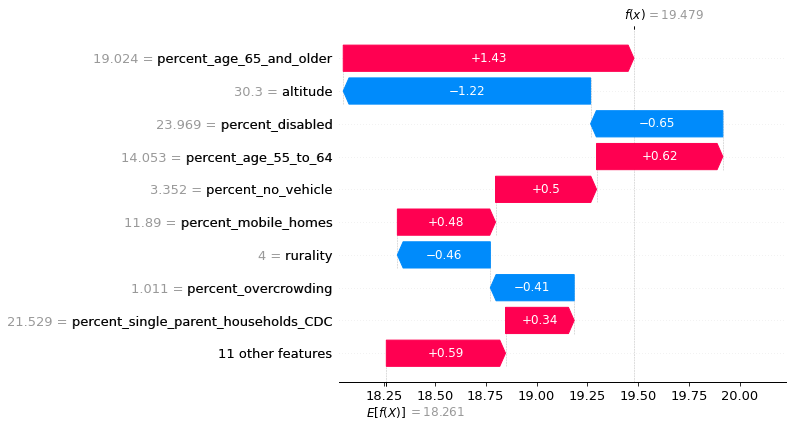

In [74]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

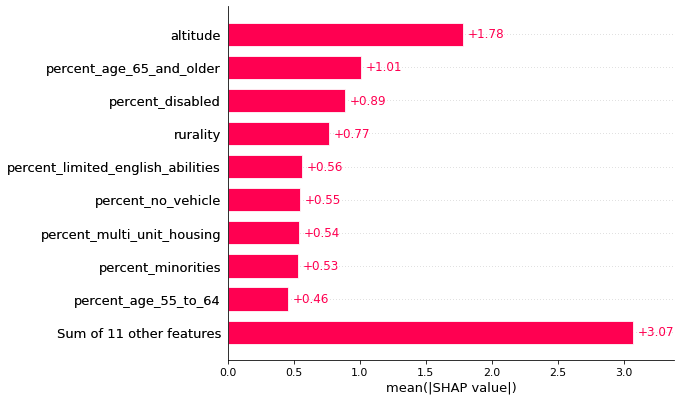

In [75]:
shap.plots.bar(shap_values)

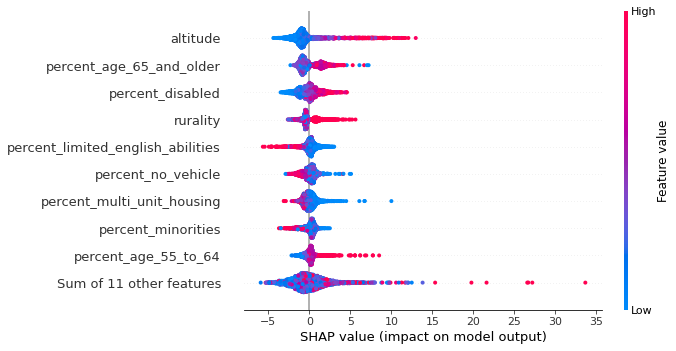

In [76]:
shap.plots.beeswarm(shap_values)

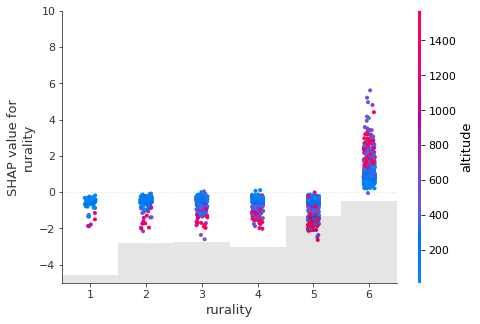

In [77]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 10)

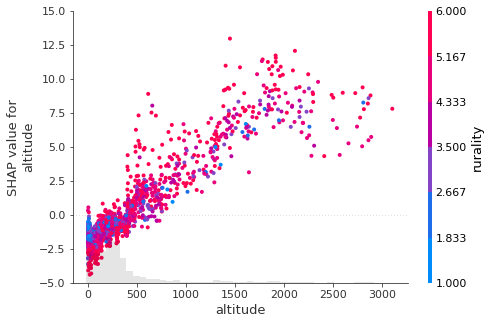

In [79]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

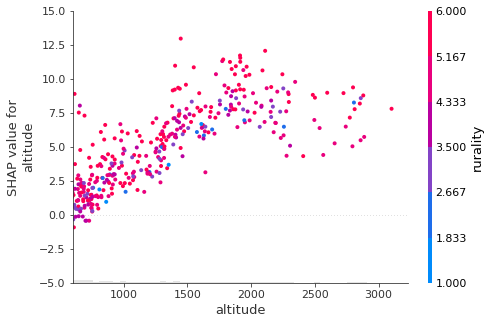

In [80]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 600)

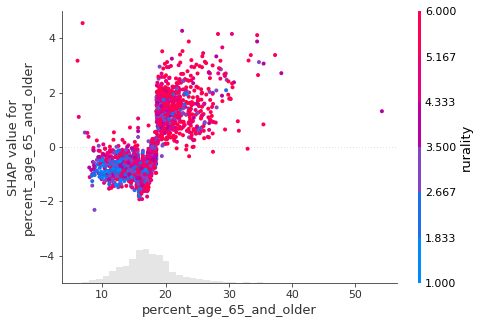

In [81]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

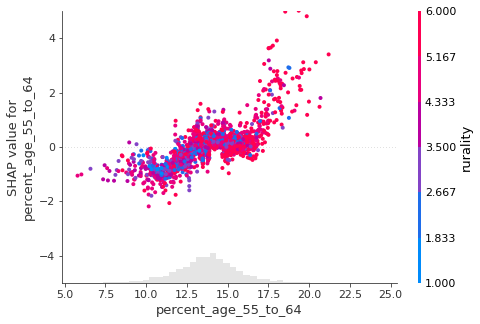

In [82]:
shap.plots.scatter(shap_values[:,"percent_age_55_to_64"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

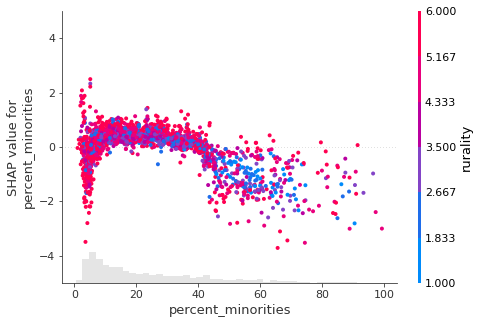

In [83]:
shap.plots.scatter(shap_values[:,"percent_minorities"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

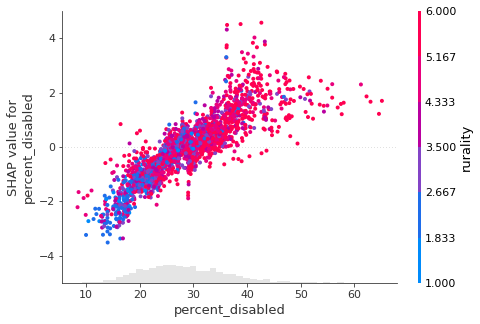

In [84]:
shap.plots.scatter(shap_values[:,"percent_disabled"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

# Check SHAP value with firearm suicide rates in 1950 counties

In [85]:
firearm_social = social.merge(suicide_firearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
firearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,27824.0,13.715679,12.797562,17.418503,5.409898,19.393812,1.125677,4.302004,14.250672,...,34.752563,0.953921,23.243763,21.062577,13.583836,14.486881,12.070281,3.0,128.66,13.722969
1,01003,29364.0,11.845462,10.168366,11.890201,3.352029,22.120923,1.011388,18.447052,19.023899,...,23.968865,1.418175,21.529063,18.729347,12.473938,13.592152,14.052911,4.0,30.30,12.444258
2,01005,17561.0,27.195808,28.056851,29.520707,9.628985,33.972450,2.023719,1.644571,17.445899,...,39.666941,10.972864,49.909322,22.953322,12.194191,13.476585,12.885004,6.0,122.81,8.353140
3,01007,20911.0,15.242034,18.651870,26.995420,5.696935,31.803710,0.520532,1.602283,15.066430,...,28.873322,9.114260,26.675203,23.228521,13.108946,15.062002,12.595217,2.0,74.90,13.284682
4,01009,22021.0,15.633381,21.183027,23.689140,4.142098,27.014413,1.807637,0.707752,17.354813,...,26.785221,0.950284,25.160434,19.642083,12.365824,14.165814,12.948480,2.0,184.46,12.111523


In [86]:
firearm_social = firearm_social.dropna()
firearm_social.shape[0]

1950

In [87]:
X = firearm_social.iloc[:, 1:-1]
y = firearm_social.iloc[:, -1].array

In [88]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


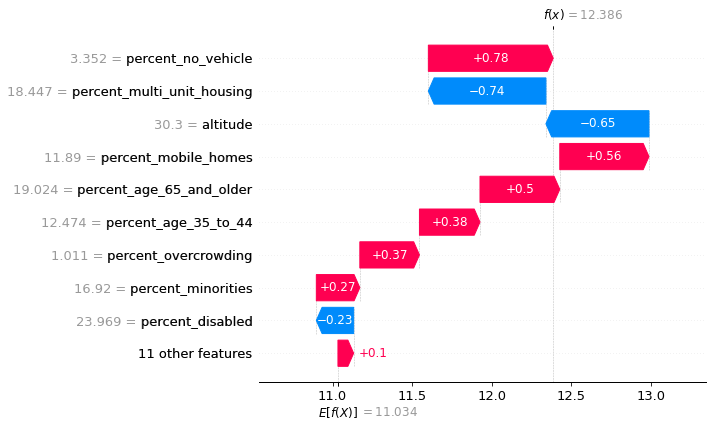

In [89]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

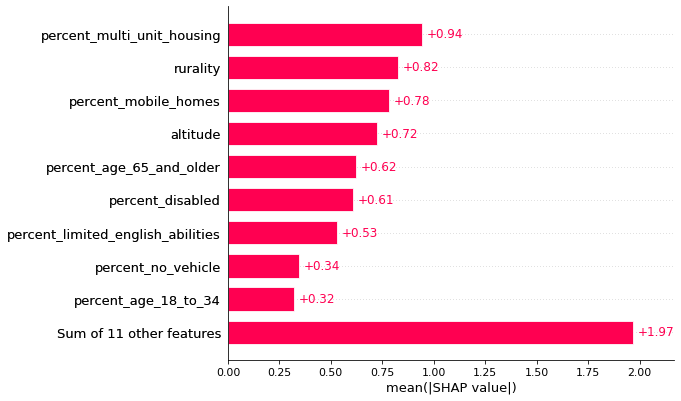

In [90]:
shap.plots.bar(shap_values)

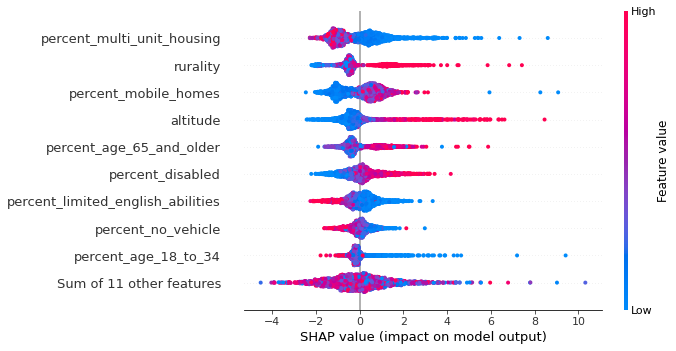

In [91]:
shap.plots.beeswarm(shap_values)

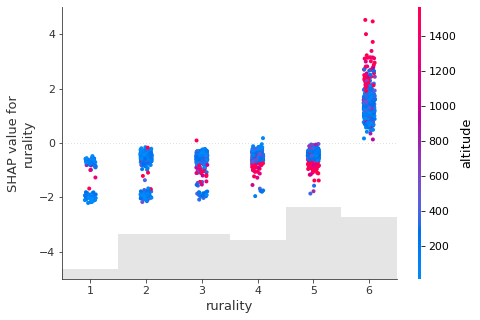

In [92]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

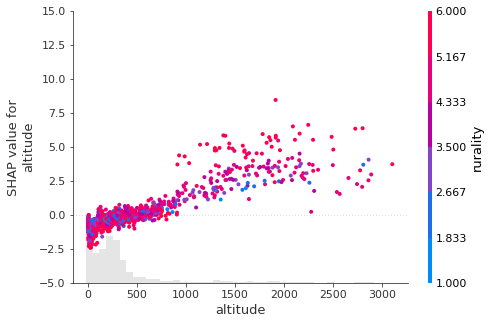

In [93]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

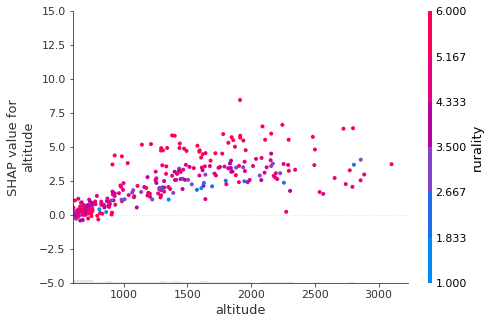

In [94]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 600)

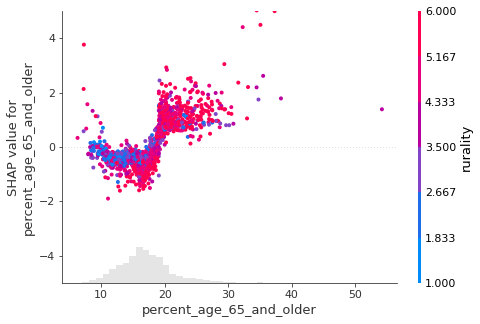

In [95]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

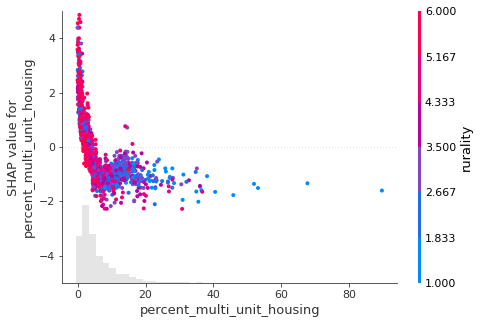

In [96]:
shap.plots.scatter(shap_values[:,"percent_multi_unit_housing"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

# Check SHAP values with nonfirearm suicide rates in 1950 counties

In [97]:
nonfirearm_social = social.merge(suicide_nonfirearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
nonfirearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,27824.0,13.715679,12.797562,17.418503,5.409898,19.393812,1.125677,4.302004,14.250672,...,34.752563,0.953921,23.243763,21.062577,13.583836,14.486881,12.070281,3.0,128.66,5.416962
1,01003,29364.0,11.845462,10.168366,11.890201,3.352029,22.120923,1.011388,18.447052,19.023899,...,23.968865,1.418175,21.529063,18.729347,12.473938,13.592152,14.052911,4.0,30.30,7.250985
2,01005,17561.0,27.195808,28.056851,29.520707,9.628985,33.972450,2.023719,1.644571,17.445899,...,39.666941,10.972864,49.909322,22.953322,12.194191,13.476585,12.885004,6.0,122.81,3.037506
3,01007,20911.0,15.242034,18.651870,26.995420,5.696935,31.803710,0.520532,1.602283,15.066430,...,28.873322,9.114260,26.675203,23.228521,13.108946,15.062002,12.595217,2.0,74.90,3.542582
4,01009,22021.0,15.633381,21.183027,23.689140,4.142098,27.014413,1.807637,0.707752,17.354813,...,26.785221,0.950284,25.160434,19.642083,12.365824,14.165814,12.948480,2.0,184.46,4.498566


In [98]:
nonfirearm_social = nonfirearm_social.dropna()
nonfirearm_social.shape[0]

1950

In [106]:
X = nonfirearm_social.iloc[:, 1:-1]
y = nonfirearm_social.iloc[:, -1].array

In [107]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


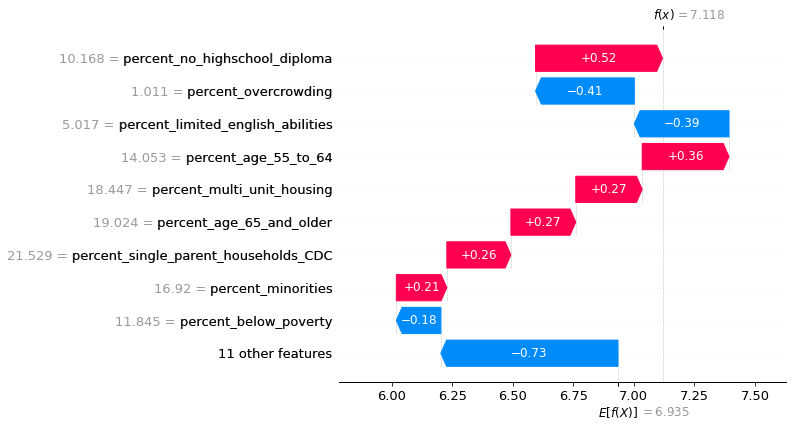

In [108]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

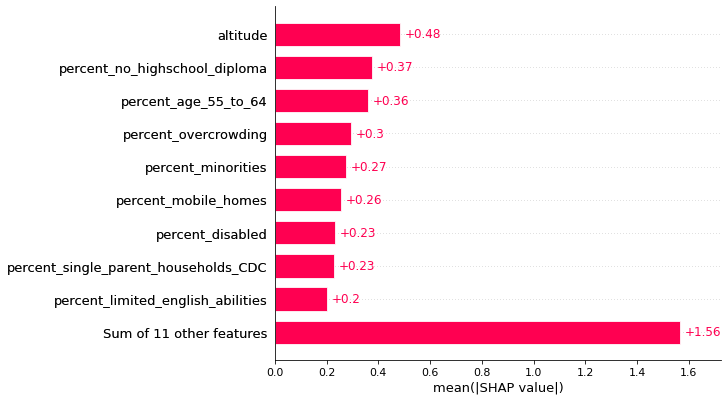

In [109]:
shap.plots.bar(shap_values)

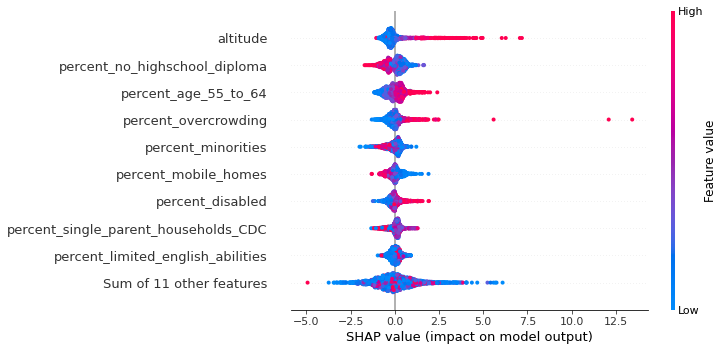

In [110]:
shap.plots.beeswarm(shap_values)

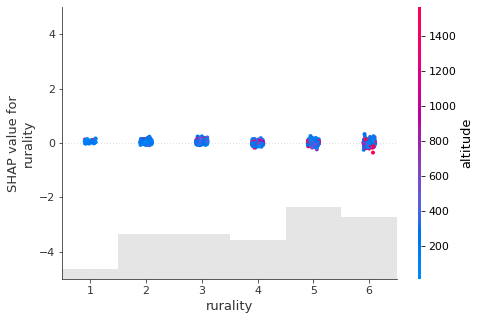

In [111]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

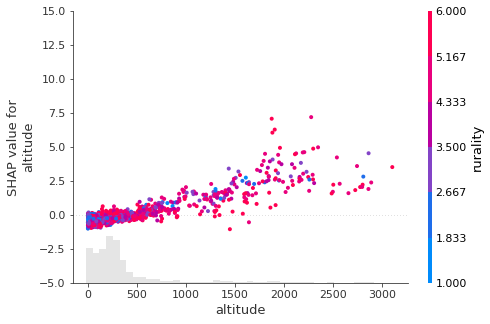

In [112]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

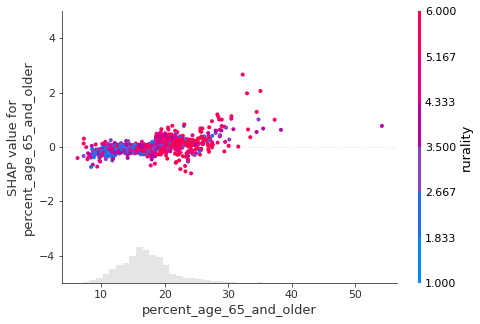

In [113]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

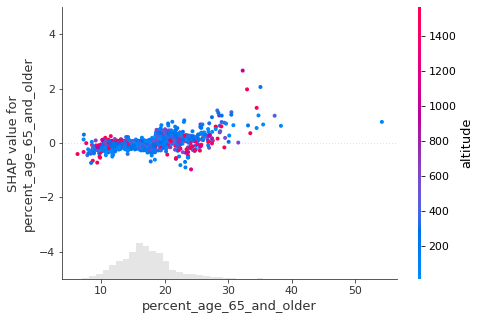

In [114]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)